# Polynomial Prediction
 
 Given a polynomial $2x^3 - x^2 + x - 5$, plot the function with Gaussian noise. Use Chi-Squared, MLE, and TensorFlow to predict the polynomial equation and integration to assess accuracy
 

## Graphing Polynomial

A graph of the function $2x^3 - x^2 + x - 5$ where $\sigma = 0$. The base plot is given here to compare to later estimates. 

True area under curve: -10.666666666666666


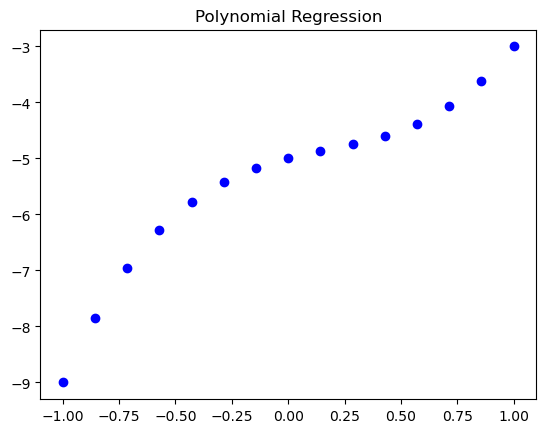

In [1]:
from polynomial_integrator import PolynomialIntegrator

import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 2*(x**3) - (x**2) + x - 5

x_values = np.linspace(start = -1, stop = 1, num = 15)

y_pred = f(x_values) # exact based on the polynomial

plt.scatter(x_values, y_pred, color = 'blue')
plt.title("Polynomial Regression")

integrator = PolynomialIntegrator([2, -1, 1, -5])
true_area = integrator.integrate_polynomial(-1, 1)[0]
print(f"True area under curve: {true_area}")



## Chi Squared Regression

Using the Chi - Squared method to find the best-fitting polynomial after generating Gaussian noise, with $\sigma$ varying between $0.1, 0.3, 0.5, 0.7,$ and $0.9$

Best-fit parameters (Chi-Squared Minimization): [ 1.98889647 -0.81567395  0.98155142 -5.09152418]
Area under the curve (sigma = 0.1). Area: -10.726830987323297. Error: 1.1909174743388925e-13


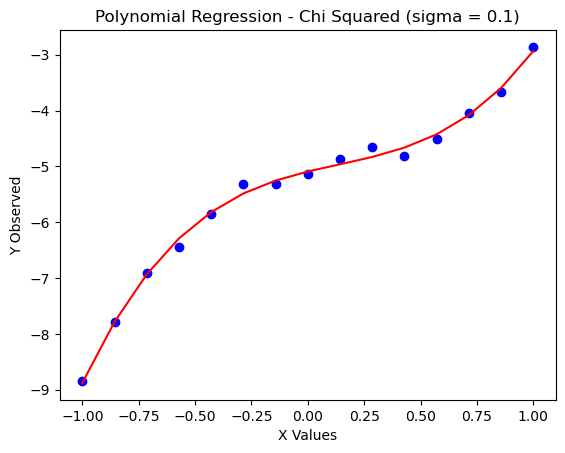

Best-fit parameters (Chi-Squared Minimization): [ 2.36238677 -0.73331448  0.75096569 -5.24677735]
Area under the curve (sigma = 0.3). Area: -10.982431012773679. Error: 1.2192947776738716e-13


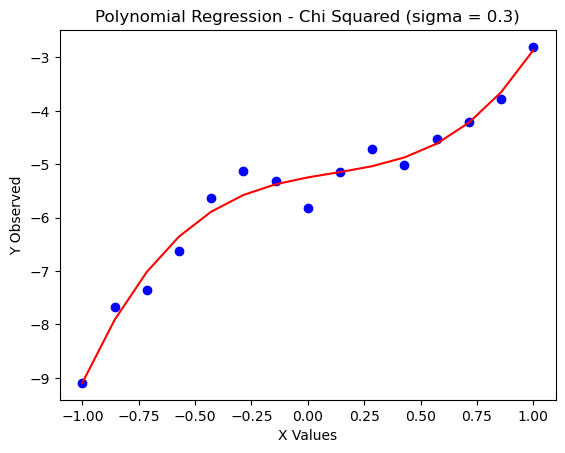

Best-fit parameters (Chi-Squared Minimization): [ 2.74585949 -0.23195599  0.28617803 -5.04878989]
Area under the curve (sigma = 0.5). Area: -10.25221711556838. Error: 1.1382247495160125e-13


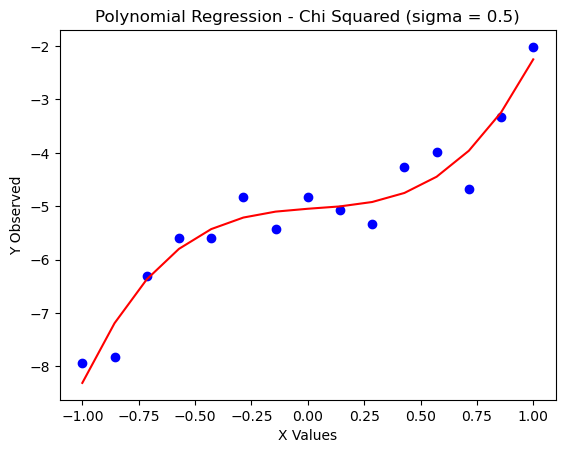

Best-fit parameters (Chi-Squared Minimization): [ 1.5334285  -0.60271192  1.99625737 -5.51849227]
Area under the curve (sigma = 0.7). Area: -11.43879248113694. Error: 1.269961078646735e-13


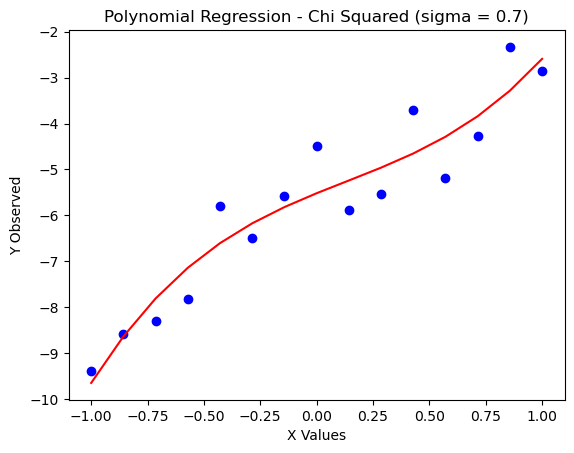

Best-fit parameters (Chi-Squared Minimization): [-0.27391834  0.11603202  2.47088126 -5.39883399]
Area under the curve (sigma = 0.9). Area: -10.72031330835325. Error: 1.1901938666129263e-13


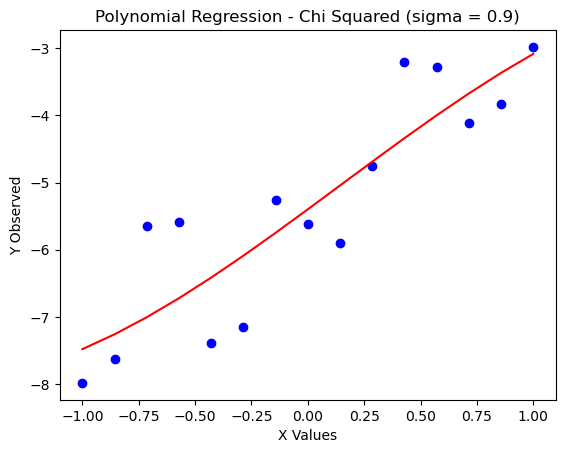

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_chi_squared import PolynomialRegressionChiSquared
from polynomial_integrator import PolynomialIntegrator

# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

chi_sq_area = np.zeros(5)


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
    # Create a PolynomialRegressionChiSquared object
    chi_sq = PolynomialRegressionChiSquared(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(chi_sq.x_values, chi_sq.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - Chi Squared (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # Minimize the chi-squared
    try:
        coeffs = chi_sq.minimize_chi_square()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing chi square for sigma = {sigma}: {e}")
    
    if coeffs is not None:
        # Integration using Simpson's Rule
        integrator = PolynomialIntegrator(coeffs)
        area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
        chi_sq_area[i] = area
        print(f"Area under the curve (sigma = {chi_sq.sigma:.1f}). Area: {area}. Error: {error}")
    else:
        print(f"Skipping integration for sigma = {sigma} due to error in minimizing chi-square.")

    plt.plot(chi_sq.x_values, np.polyval(coeffs, chi_sq.x_values), color='red')
        # Show the plot inline
    plt.show()

## MLE 

Best-fit parameters (MLE): [ 2.32609967 -1.07959001  0.77166888 -4.98297158]
Area under the curve (sigma = 0.1). Area: -10.68566984361565. Error: 1.186347669392479e-13


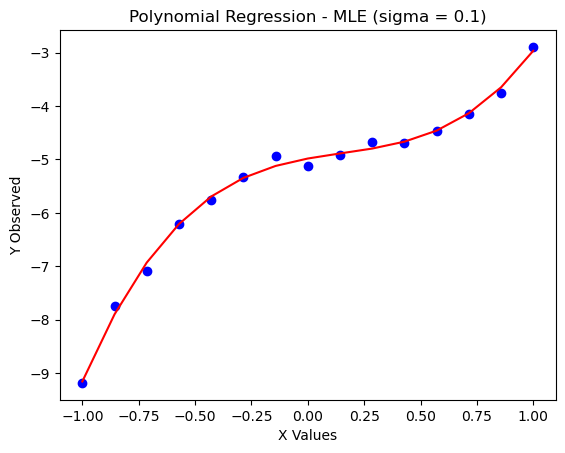

Best-fit parameters (MLE): [ 2.39967708 -0.94979459  0.65567715 -4.97659618]
Area under the curve (sigma = 0.3). Area: -10.586388755976913. Error: 1.1753252544518437e-13


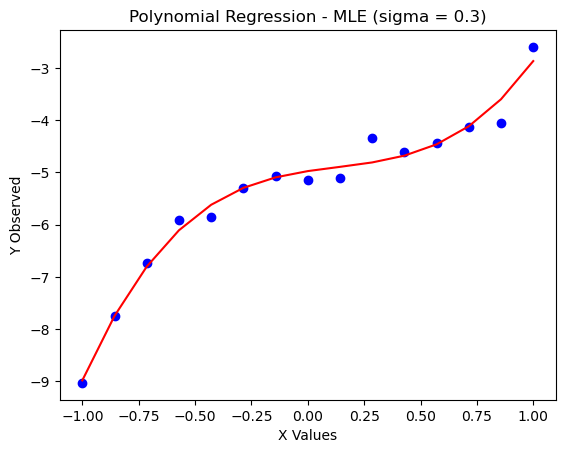

Best-fit parameters (MLE): [ 1.44528111 -0.76976291  1.08822571 -4.9619942 ]
Area under the curve (sigma = 0.5). Area: -10.437163677008456. Error: 1.158757942599615e-13


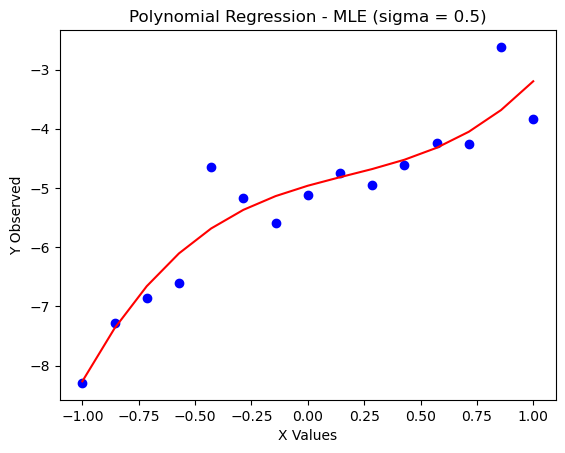

Best-fit parameters (MLE): [ 2.35660759 -1.19206488  0.60146177 -5.02529786]
Area under the curve (sigma = 0.7). Area: -10.845305639137697. Error: 1.2040708029667722e-13


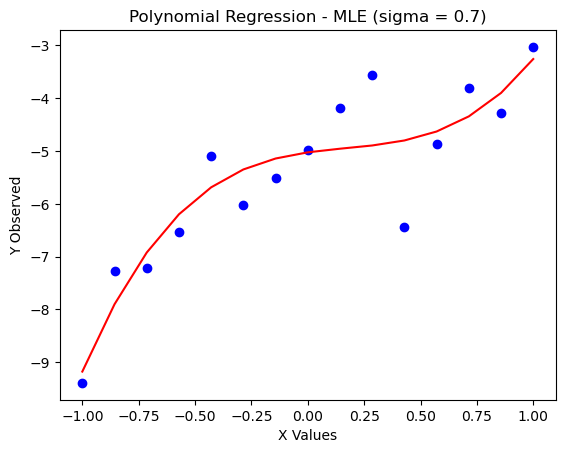

Best-fit parameters (MLE): [ 3.14537788 -0.18960317  0.62231713 -5.04857919]
Area under the curve (sigma = 0.9). Area: -10.223560494977786. Error: 1.13504322551725e-13


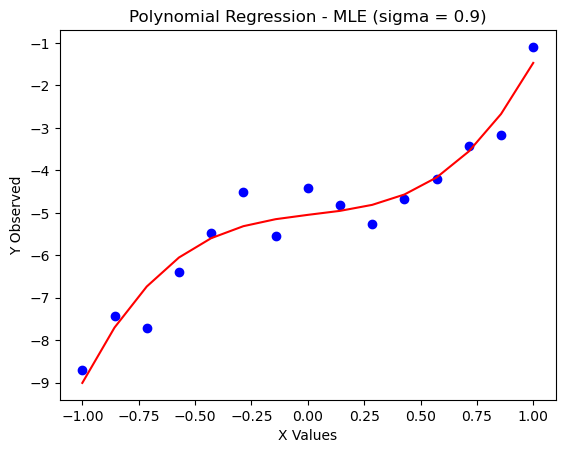

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_mle import PolynomialRegressionMLE
from polynomial_integrator import PolynomialIntegrator

## arrays to hold area
mle_area = np.zeros(5)

# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    

    mle = PolynomialRegressionMLE(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(mle.x_values, mle.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - MLE (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # minimize MLe
    try:
        coeffs = mle.minimize_mle()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing negative log likelihood for sigma = {sigma}: {e}")
    
    if coeffs is not None:
        # Integration using Simpson's Rule
        integrator = PolynomialIntegrator(coeffs)
        area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
        mle_area[i] = area
        print(f"Area under the curve (sigma = {mle.sigma:.1f}). Area: {area}. Error: {error}")
    else:
        print(f"Skipping integration for sigma = {mle.sigma} due to error in MLE.")
        
    plt.plot(mle.x_values, np.polyval(coeffs, mle.x_values), color='red')
    # Show the plot inline
    plt.show()

Epoch 0, Loss: 32.77931213378906
Epoch 100, Loss: 0.010255381464958191
Epoch 200, Loss: 0.006444905884563923
Epoch 300, Loss: 0.018489893525838852
Learned parameters appended to learned_params.txt
[2.0091577, -0.99519676, 0.98325664, -4.9971304]


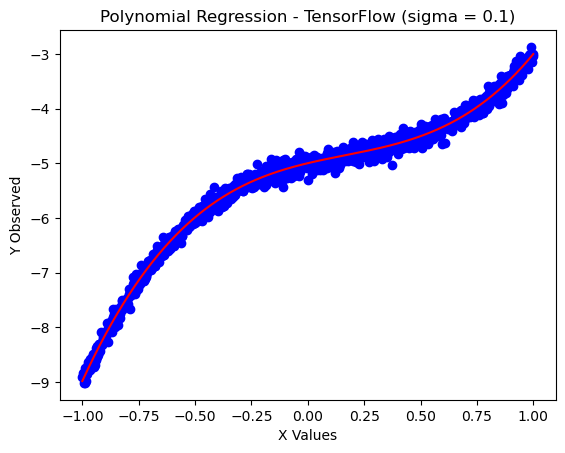

Area under the curve (sigma = 0.1). Area: -10.65772529443105. Error: 1.1832452012007277e-13
Epoch 0, Loss: 13.425207138061523
Epoch 100, Loss: 0.16867154836654663
Epoch 200, Loss: 0.12024562060832977
Epoch 300, Loss: 0.07199548184871674
Learned parameters appended to learned_params.txt
[2.0109336, -0.9897376, 1.0243917, -4.999947]


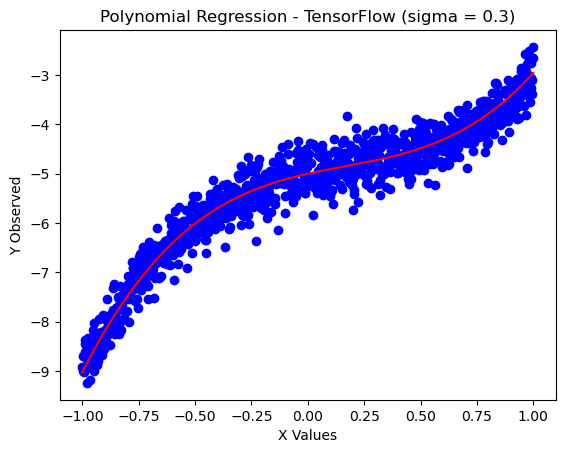

Area under the curve (sigma = 0.3). Area: -10.659719189008078. Error: 1.183466567967537e-13
Epoch 0, Loss: 27.352920532226562
Epoch 100, Loss: 0.15386340022087097
Epoch 200, Loss: 0.3530902862548828
Epoch 300, Loss: 0.6107373237609863
Learned parameters appended to learned_params.txt
[2.1245584, -1.0467155, 0.9863897, -5.0081654]


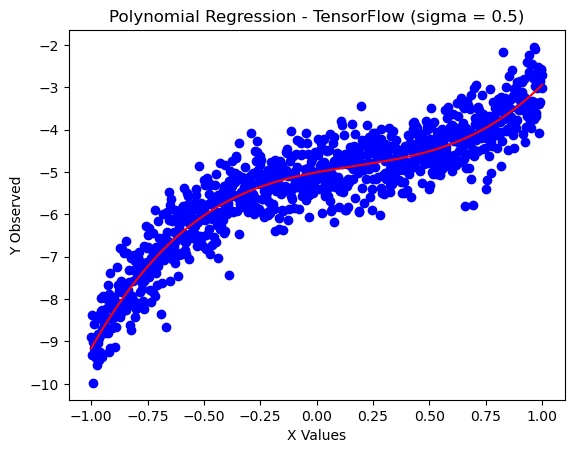

Area under the curve (sigma = 0.5). Area: -10.714141050974527. Error: 1.1895086083873492e-13
Epoch 0, Loss: 36.792701721191406
Epoch 100, Loss: 0.4397108554840088
Epoch 200, Loss: 0.5314996242523193
Epoch 300, Loss: 0.5022549629211426
Learned parameters appended to learned_params.txt
[1.8774765, -0.95641655, 1.0103928, -5.006988]


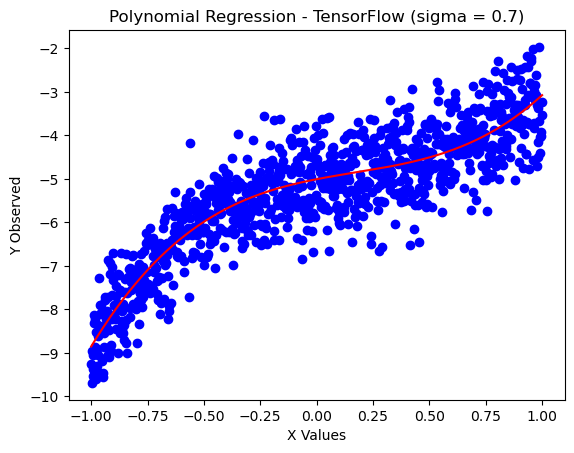

Area under the curve (sigma = 0.7). Area: -10.651587128639221. Error: 1.1825637279016223e-13
Epoch 0, Loss: 22.857290267944336
Epoch 100, Loss: 1.1524791717529297
Epoch 200, Loss: 1.1287649869918823
Epoch 300, Loss: 0.5682480335235596
Learned parameters appended to learned_params.txt
[2.0283349, -1.0462694, 1.0634238, -4.965067]


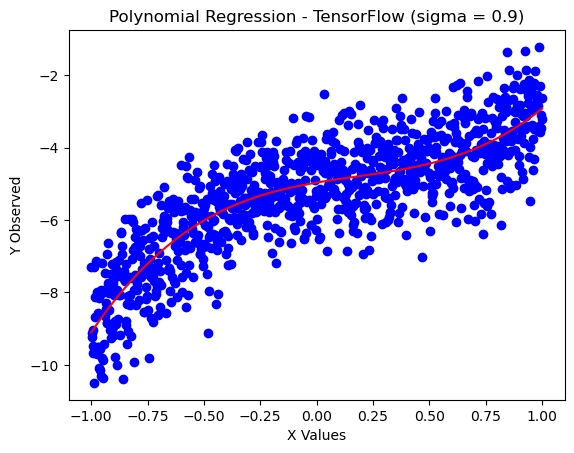

Area under the curve (sigma = 0.9). Area: -10.627646764119467. Error: 1.1799058135108473e-13


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_tf import CubicPolynomialModel
from polynomial_integrator import PolynomialIntegrator  

# Arrays to hold areas
tf_area = np.zeros(5)

# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

# File to log all training results
log_file = "training_log.txt"

# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
    try:
        # Instantiate the model with the current sigma
        model = CubicPolynomialModel(num_points=1000, sigma=sigma, learning_rate=0.01, batch_size=32)
        
        # Log the start of training for this sigma value
        with open(log_file, 'a') as file:
            file.write(f"\nTraining started for sigma = {sigma:.1f} at {model.get_timestamp()}\n")
            file.write("Epoch\tLoss\n")
        
        # Train the model and log the progress in the same file
        model.train(n_epochs=400, log_file=log_file)
        
        # Save the learned parameters to a file
        model.save_learned_parameters(param_file="learned_params.txt")
        
        # Get the model coefficients
        coeffs = [model.a.numpy(), model.b.numpy(), model.c.numpy(), model.d.numpy()]
        
        
        print(coeffs)
            # Plot the observed data
        plt.figure()  # Create a new figure
        
        # Set title and labels
        plt.title(f"Polynomial Regression - TensorFlow (sigma = {sigma:.1f})")
        plt.xlabel('X Values')
        plt.ylabel('Y Observed')

        plt.scatter(model.x_values, model.y_values, color = "blue")
        plt.plot(model.x_values, np.polyval(coeffs, model.x_values), color='red')
        plt.show()
        
        # Integrate if coefficients are valid
        if coeffs is not None:
            integrator = PolynomialIntegrator(coeffs)
            area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
            tf_area[i] = area
            print(f"Area under the curve (sigma = {sigma:.1f}). Area: {area}. Error: {error}")
            
            # Log the area and integration result in the same log file
            with open(log_file, 'a') as file:
                file.write(f"Integration completed for sigma = {sigma:.1f} at {model.get_timestamp()}\n")
                file.write(f"Area under the curve: {area:.5f}, Error: {error}\n")
        else:
            print(f"Error: Coefficients are not valid for sigma = {sigma:.1f}")
    
    except Exception as e:
        print(f"Error in Training Model for sigma = {sigma}: {e}")
        with open(log_file, 'a') as file:
            file.write(f"Error in Training Model for sigma = {sigma:.1f} at {model.get_timestamp()}: {e}\n")

# # Optional: Plot the results if needed
# plt.plot(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP), tf_area, marker='o')
# plt.title("Area Under the Curve vs. Sigma")
# plt.xlabel("Sigma")
# plt.ylabel("Area Under the Curve")
# plt.grid(True)
# plt.show()


## Comparing integration accuracy for Chi Squared, MLE, and TensorFlow
The table on top shows the areas calculated by integrating the curves with noise for all three methods. THe table below shows how they differ from the true calculation. 

In [5]:
# Define constants
from tabulate import tabulate
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

data = [chi_sq_area, mle_area, tf_area]

row_labels = ['Chi-Squared', 'MLE', "TensorFlow"]

head = np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)
formatted_head = [f"{sigma:.1f}" for sigma in head]

print("Raw Data")
print(tabulate(data, headers = formatted_head, showindex=row_labels))
print()

print("Area differential")
differential_data = [chi_sq_area - true_area, mle_area - true_area, tf_area - true_area]
print(tabulate(differential_data, headers = formatted_head, showindex=row_labels))

   
    

Raw Data
                  0.1       0.3       0.5       0.7       0.9
-----------  --------  --------  --------  --------  --------
Chi-Squared  -10.7268  -10.9824  -10.2522  -11.4388  -10.7203
MLE          -10.6857  -10.5864  -10.4372  -10.8453  -10.2236
TensorFlow   -10.6577  -10.6597  -10.7141  -10.6516  -10.6276

Area differential
                     0.1          0.3         0.5         0.7         0.9
-----------  -----------  -----------  ----------  ----------  ----------
Chi-Squared  -0.0601643   -0.315764     0.41445    -0.772126   -0.0536466
MLE          -0.0190032    0.0802779    0.229503   -0.178639    0.443106
TensorFlow    0.00894137   0.00694748  -0.0474744   0.0150795   0.0390199
